In [1]:
from preperation import *
from initial_plots import read_dataset
from classification import *

In [2]:
df = read_dataset(gt=False)
X = np.array(df)

df = read_dataset(gt=True)
y = np.array(df)

rows_factor=21
cols_factor=21

In [3]:
distances,P,y_patches = prepare(X,y, rows_factor, cols_factor)

(510, 45423)
(510, 510)
(510, 510)


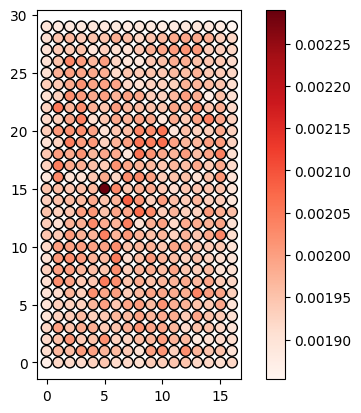

In [4]:
figure_B(distances, rows_factor, cols_factor)

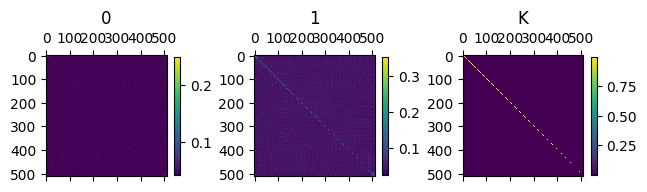

In [5]:
HDE = display_figure_C(distances)

In [6]:
d_HDD = hdd(HDE,P)

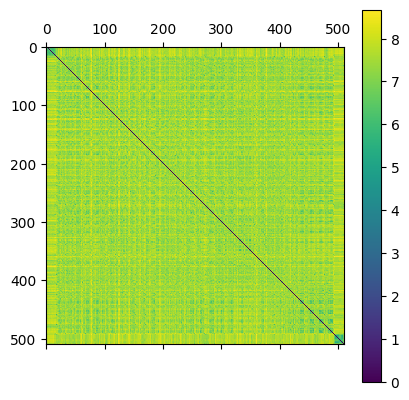

In [7]:
mat_show(d_HDD, plt.cm.viridis)

In [16]:
y_patches = y_patches.astype(int)


train_acc_arr = []
test_acc_arr = []

for i in range(10):
    train_acc,test_acc = main(d_HDD, y_patches)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)

print("XXXXXXXXXXXXXXXXXXXXXXXXXX")
print("MEAN TRAIN ACC: ", np.mean(train_acc_arr))
print("MEAN TEST ACC: ", np.mean(test_acc_arr))


Train Accuracy:  1.0
Test Accuracy:  0.782608695652174
